In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import torch as pt
import sys

sys.path.insert(0, '..')

from function_space import DenseNet, SingleParam
from problems import LLGC
from solver import Solver
from utilities import do_importance_sampling, plot_loss_logs, plot_solution, save_exp_logs, load_exp_logs

%load_ext autoreload
%autoreload 2

device = pt.device('cuda')

## d = 1

In [ ]:
seed = 42

llgc_d1 = LLGC(d=1, T=1, seed=seed)

K = 200
print_every = 100
L = 500
lr = 0.01
delta_t = 0.01
IS_K = 20000

models_d1 = [Solver(name='moment', problem=llgc_d1, loss_method='moment', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True, learn_Y_0=True),
          Solver(name='variance', problem=llgc_d1, loss_method='variance', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='log-variance', problem=llgc_d1, loss_method='log-variance', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='relative entropy', problem=llgc_d1, loss_method='relative_entropy', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=False,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='cross-entropy', problem=llgc_d1, loss_method='cross_entropy', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True)]

for model in models_d1:
    model.z_n = DenseNet(d_in=model.d + 1, d_out=model.d, lr=model.lr)
    model.update_Phis()
    model.train()
    
#save_exp_logs(models_d1, 'paper/LLGC_d1')

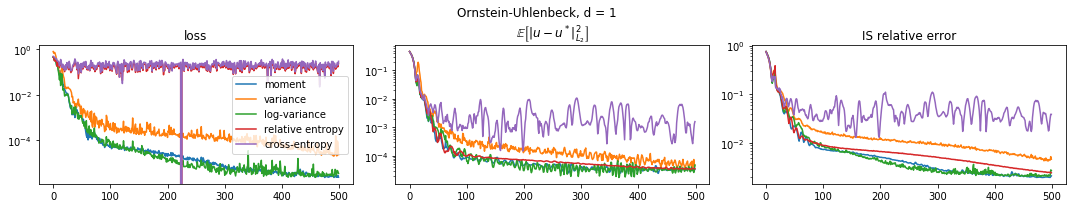

In [21]:
fig = plot_loss_logs('Ornstein-Uhlenbeck', models_d1)

## d = 2

In [ ]:
seed = 42

llgc_d2 = LLGC(d=2, off_diag=0.1, T=1, seed=seed)

K = 200
print_every = 100
L = 500
lr = 0.01
delta_t = 0.01
IS_K = 20000

models_d2 = [Solver(name='moment', problem=llgc_d2, loss_method='moment', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True, learn_Y_0=True),
          Solver(name='variance', problem=llgc_d2, loss_method='variance', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='log-variance', problem=llgc_d2, loss_method='log-variance', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='relative entropy', problem=llgc_d2, loss_method='relative_entropy', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=False,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='cross-entropy', problem=llgc_d2, loss_method='cross_entropy', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True)]

for model in models_d2:
    model.z_n = DenseNet(d_in=model.d + 1, d_out=model.d, lr=model.lr)
    model.update_Phis()
    model.train()
    
save_exp_logs(models_d2, 'LLGC_d2')

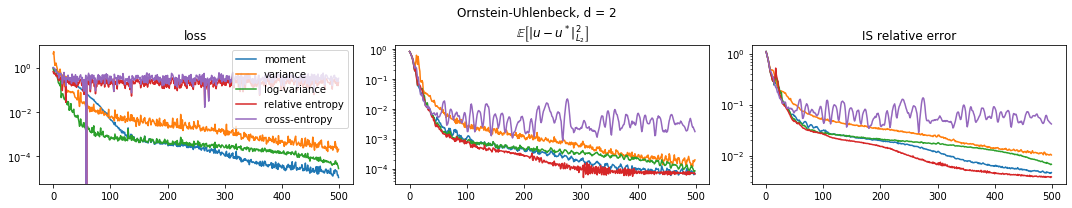

In [29]:
fig = plot_loss_logs('Ornstein-Uhlenbeck', models_d2)

## d = 40

In [ ]:
seed = 42

llgc_d40 = LLGC(d=40, off_diag=0.1, T=1, seed=seed)

K = 500
print_every = 1000
L = 10000
lr = 0.001
delta_t = 0.01
IS_K = 20000

models_d40 = [Solver(name='moment', problem=llgc_d40, loss_method='moment', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True, learn_Y_0=True),
          Solver(name='log-variance', problem=llgc_d40, loss_method='log-variance', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='relative entropy', problem=llgc_d40, loss_method='relative_entropy', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=False,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True),
          Solver(name='cross-entropy', problem=llgc_d40, loss_method='cross_entropy', L=L, lr=lr, seed=seed,
                 delta_t=delta_t, K=K, IS_variance_K=IS_K, plot_trajectories=None, detach_forward=True,
                 print_every=print_every, time_approx='inner', adaptive_forward_process=True)]

for model in models_d40:
    model.z_n = DenseNet(d_in=model.d + 1, d_out=model.d, lr=model.lr)
    #model.z_n.optim = pt.optim.SGD(model.z_n.parameters(), lr=model.lr)
    model.update_Phis()
    model.train()

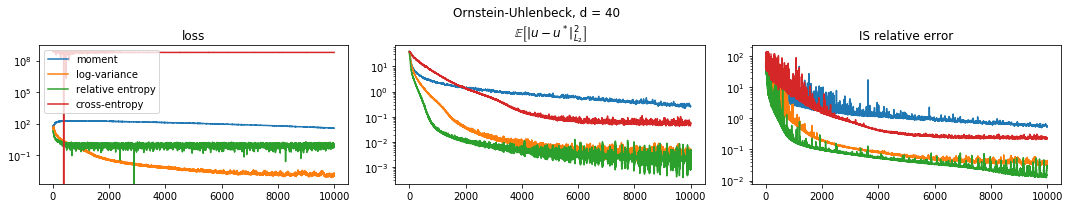

In [34]:
fig = plot_loss_logs('Ornstein-Uhlenbeck', models_d40)

In [8]:
#save_exp_logs(models_d40, 'paper/LLGC_d40')

## Plots for the paper

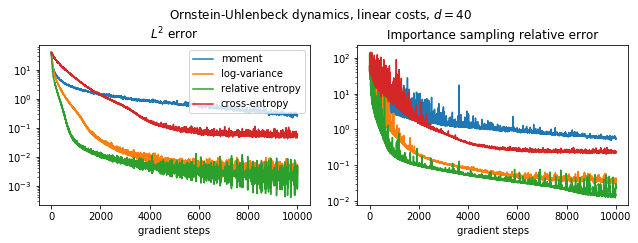

In [30]:
exp_logs = load_exp_logs('paper/LLGC_d40_2020-04-26.json')

fig, ax = plt.subplots(1, 2, figsize=(9, 3.5))
fig.suptitle(r'Ornstein-Uhlenbeck dynamics, linear costs, $d = 40$')

for model_name in exp_logs:
    ax[0].plot(exp_logs[model_name]['u_L2_loss'], label=model_name)
    ax[1].plot(exp_logs[model_name]['IS_rel_log'])
    ax[1].set_yscale('log')
    ax[1].set_title('Importance sampling relative error')
ax[0].set_yscale('log')
ax[0].set_title('$L^2$ error')
ax[0].legend()
ax[0].set_xlabel('gradient steps')
ax[1].set_xlabel('gradient steps')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.savefig('img/LLGC_d40_loss_log.pdf')

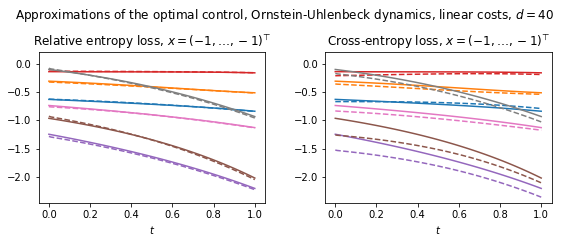

In [48]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

ylims = None

model_1 = models_d40[2]
model_2 = models_d40[3]
components = [1, 0, 3, 4, 5, 6, 7]

x = -1.0
t = 0
n = int(np.ceil(t / model.delta_t_np))
t_range = np.linspace(0, model.T, model.N)
X = pt.autograd.Variable(pt.tensor([[x] * model.d]), requires_grad=True).to(device)


fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

fig.suptitle(r'Approximations of the optimal control, Ornstein-Uhlenbeck dynamics, linear costs, $d = 40$')

ax[0].set_title(r'Relative entropy loss, $x = (%.0f, \dots, %.0f)^\top$' % (x, x))
for j in components:
    if model_1.u_true(X.cpu().detach(), n * model.delta_t_np) is not None:
        ax[0].plot(t_range, [model_1.u_true(X.cpu().detach(), n * model_1.delta_t_np)[j].item() for n in
                             range(model_1.N)], label=r'true $x_%d$' % (j + 1), color=COLORS[j])
    ax[0].plot(t_range, [-model_1.Z_n(X, t)[0, j].item() for t in t_range], '--',
               label=r'approx $x_%d$' % (j + 1), color=COLORS[j])
if ylims is not None:
    ax[0].set_ylim(ylims[1][0], ylims[1][1])
ax[0].set_xlabel(r'$t$')

ax[1].set_title(r'Cross-entropy loss, $x = (%.0f, \dots, %.0f)^\top$' % (x, x))
for j in components:
    if model_2.u_true(X.cpu().detach(), n * model_2.delta_t_np) is not None:
        ax[1].plot(t_range, [model_2.u_true(X.cpu().detach(), n * model_2.delta_t_np)[j].item() for n in
                             range(model_2.N)], label=r'true $x_%d$' % (j + 1), color=COLORS[j])
    ax[1].plot(t_range, [-model_2.Z_n(X, t)[0, j].item() for t in t_range], '--',
               label=r'approx $x_%d$' % (j + 1), color=COLORS[j])
if ylims is not None:
    ax[1].set_ylim(ylims[1][0], ylims[1][1])
ax[1].set_xlabel(r'$t$');
ax[0].set_ylim(-2.45, 0.2)
ax[1].set_ylim(-2.45, 0.2)
fig.tight_layout(rect=[0, 0.03, 1, 0.92])
#fig.savefig('img/LLGC_d40_u_approx.pdf')